In [44]:
from sklearn import datasets, svm, metrics
import numpy as np
from tensorflow.keras.datasets import mnist
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pickle
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [93]:
test_data = np.load("../app/test_data.npy")

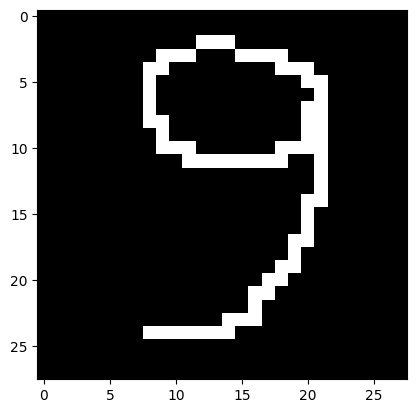

In [94]:
plt.imshow(test_data[99].reshape((28,28)) ,cmap = "gray") #28 arays of 28 characters

In [89]:
test_numbers = []
for i in range(10):
    for j in range(10):
        test_numbers.append(i)

In [90]:
# clf = pickle.load(open("../cutom_svm.sav", 'rb'))

In [47]:
clf = svm.SVC()

In [56]:
clf.fit(test_data, test_numbers)

SVC()

In [84]:
predicted = clf.predict(test_data)

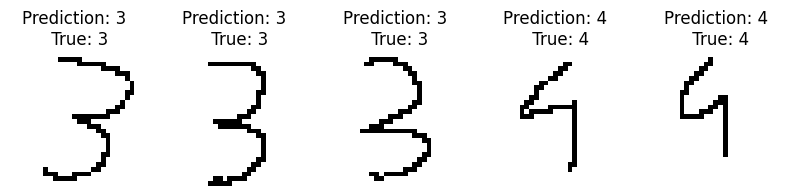

In [73]:
_, axes = plt.subplots(nrows=1, ncols=5, figsize=(10, 3))
for ax, image, prediction, label in zip(axes, test_data[37:42], predicted[37:42], test_numbers[37:42]):
    ax.set_axis_off()
    image = image.reshape(28, 28)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Prediction: {prediction} \n True: {label}")
#showing results

In [85]:
print(
    f"Classification report for classifier {clf}:\n"
    f"{metrics.classification_report(test_numbers, predicted)}\n"
)

Classification report for classifier SVC():
              precision    recall  f1-score   support

           0       0.91      1.00      0.95        10
           1       1.00      0.90      0.95        10
           2       1.00      1.00      1.00        10
           3       1.00      1.00      1.00        10
           4       1.00      1.00      1.00        10
           5       1.00      1.00      1.00        10
           6       1.00      1.00      1.00        10
           7       1.00      1.00      1.00        10
           8       1.00      1.00      1.00        10
           9       1.00      1.00      1.00        10

    accuracy                           0.99       100
   macro avg       0.99      0.99      0.99       100
weighted avg       0.99      0.99      0.99       100




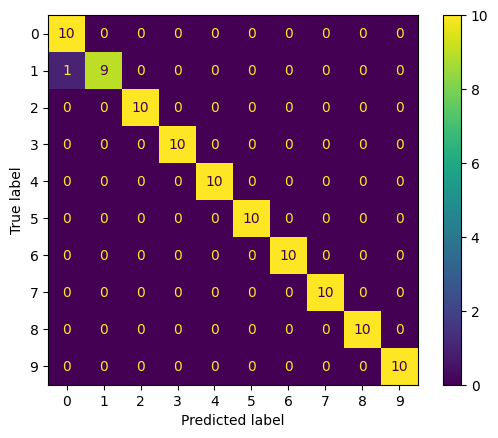

In [87]:
con_matrix = confusion_matrix(test_numbers, predicted)
disp = ConfusionMatrixDisplay(confusion_matrix=con_matrix)
disp.plot()

In [88]:
pickle.dump(clf, open("cutom_svm.sav", 'wb'))